# Making the necessary imports

In [12]:
import numpy as np
import pandas as pd
from numpy.random import choice
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from collections import defaultdict


# Loading the Dataset

In [ ]:
df = pd.read_csv(os.path.join(os.getcwd(), 'kerala.csv'))

# Gaining some instights about the dataset

In [14]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [16]:
df.columns = list(map(lambda x: x.strip(), df.columns))

In [17]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [18]:
df["SUBDIVISION"].unique()

array(['KERALA', 'KERALA '], dtype=object)

In [19]:
df["SUBDIVISION"] = df["SUBDIVISION"].replace("KERALA ", "KERALA")

In [20]:
df["SUBDIVISION"].unique()

array(['KERALA'], dtype=object)

# Checking for null values

In [21]:
df.isna().sum()

SUBDIVISION        0
YEAR               0
JAN                0
FEB                0
MAR                0
APR                0
MAY                0
JUN                0
JUL                0
AUG                0
SEP                0
OCT                0
NOV                0
DEC                0
ANNUAL RAINFALL    0
FLOODS             0
dtype: int64

# Converting the target variable (FLOODS) to numerical

In [22]:
df["FLOODS"]

0      YES
1      YES
2      YES
3      YES
4       NO
      ... 
113    YES
114     NO
115     NO
116     NO
117    YES
Name: FLOODS, Length: 118, dtype: object

In [23]:
df["FLOODS"] = pd.Categorical(df["FLOODS"]).codes

In [24]:
df["FLOODS"]

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int8

# Seperating the features (input) from the target (output)

#X - features
>We are dropping the SUBDIVISION and YEAR columns because they have no effect in making predictions. Instead, they are only going to be noise to the model leading to low accuracy. Notice that we also exclude the FLOODS column since it is the target variable.
#y - target
> This is the target (output) i.e., what the model will be predicting

In [25]:
X = df.drop(["FLOODS", "SUBDIVISION", "YEAR", "ANNUAL RAINFALL"], axis=1)
y = df["FLOODS"]

In [26]:
X.columns

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')

In [27]:
X.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int8

# Visualizing the rainfall amounts for different months selected at random

In [29]:
columns = list(X.columns)
random_columns = choice(columns, 4, replace=False)

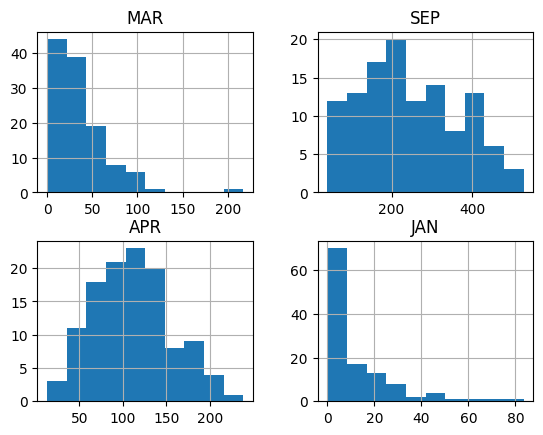

In [30]:
X[random_columns].hist()
plt.show()

# Global variable to specify the directory to save the scaler object and best model

In [72]:
save_dir = "/content/gdrive/MyDrive/Floods_Prediction_Best_Model"

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

# Standardizing the features to a scale of between 0 and 1

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
X_scaled = scaler.fit_transform(X.values)

In [24]:
X_scaled[0,:5]

array([0.34371257, 0.56582278, 0.23721787, 0.65317919, 0.17697695])

# Saving the Scaler object

In [73]:
with open(os.path.join(save_dir, "scaler.pkl"), 'wb') as pickle_file:
    pickle.dump(scaler, pickle_file)

# Loading the Scaler object

In [74]:
with open(os.path.join(save_dir, "scaler.pkl"), 'rb') as pickle_file:
    loaded_scaler = pickle.load(pickle_file)

# Splitting the dataset into the train set and the test set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [26]:
X_train[:5]

array([[0.01317365, 0.19873418, 0.12989406, 0.39662072, 0.36912752,
        0.44686044, 0.43105224, 0.04556257, 0.32962505, 0.73788546,
        0.98832685, 0.03264095],
       [0.10898204, 0.01139241, 0.12989406, 0.42996888, 0.23504523,
        0.44475261, 0.21898455, 0.0962878 , 0.22414504, 0.23067681,
        0.29991021, 0.76854599],
       [0.00958084, 0.3835443 , 1.        , 0.42374389, 0.04056026,
        0.30297315, 0.24841795, 0.13963779, 0.62978986, 0.55046055,
        0.07153547, 0.08358061],
       [0.03952096, 0.01898734, 0.28788577, 0.24855491, 0.20163408,
        0.26780564, 0.55732156, 0.07432599, 0.58755665, 0.27372847,
        0.72702784, 0.21810089],
       [0.09461078, 0.14810127, 0.06909258, 0.61582926, 0.43463671,
        0.61970268, 0.22023547, 0.11546341, 0.28244747, 0.57028434,
        0.43909009, 0.04451039]])

In [27]:
y_train.head()

76     1
64     0
107    0
108    0
55     0
Name: FLOODS, dtype: int8

# A utility function to print out the performance metrics of a model

In [28]:
global scores 
scores = defaultdict(dict)



def performance_metrics(model):
  model.fit(X_train, y_train)
  cv_acc_score = cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy', n_jobs=-1)
  y_pred = model.predict(X_test)
  scores[model.__class__.__name__] = {"cv_score": round(cv_acc_score.mean(), 4), "acc_score": round(accuracy_score(y_test,y_pred)*100, 4)}

  print(f"\nModel: {model}\n")
  print("*"*80)
  print(f"Predicted values: {y_pred}")
  print(f"Actual values: {np.array(y_test)}")
  print("*"*80)

  print("-"*80)
  print(f"Cross Validation Mean Accuracy Score: {cv_acc_score.mean()}")
  print(f"accuracy score: {accuracy_score(y_test,y_pred)*100}")
  print(f"recall score: {recall_score(y_test,y_pred)*100}")
  print(f"roc score: {roc_auc_score(y_test,y_pred)*100}") 
  print("-"*80)

  print(f"\nConfusion Matrix\n")
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True)
  plt.show()

# Prediction Algorithms
<ol>
  <li> Logistic Regression </li>
  <li> Support Vector Machine </li>
  <li> K-Nearest Neighbor </li>
  <li> Decision Tree Classifier </li>
  <li> Random Forest Classifier </li>
</ol>



# 1. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

> ## Hyper-parameter tuning

In [30]:
params = {
    "solver": ["newton-cg", "lbfgs", "sag", "saga"], 
    "C": [0.001, 0.01, 0.1, 1]
    }
grid_lr = GridSearchCV(estimator=lr, param_grid=params, scoring='accuracy', cv=3) 
grid_lr.fit(X_train, y_train)
lr = grid_lr.best_estimator_

> ## Perfomance Metrics


Model: LogisticRegression(C=1, solver='newton-cg')

********************************************************************************
Predicted values: [0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0]
Actual values: [0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0]
********************************************************************************
--------------------------------------------------------------------------------
Cross Validation Mean Accuracy Score: 0.7916666666666666
accuracy score: 95.83333333333334
recall score: 91.66666666666666
roc score: 95.83333333333333
--------------------------------------------------------------------------------

Confusion Matrix



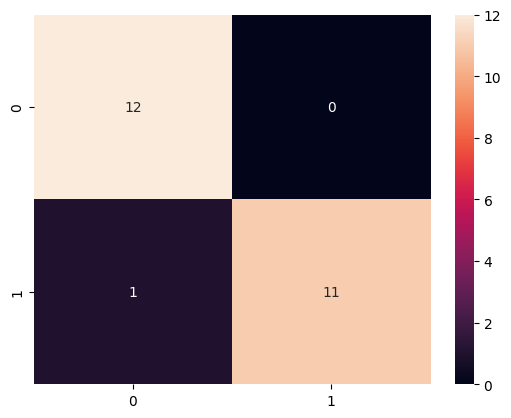

In [31]:
performance_metrics(lr)

# 2. Support Vector Machine

In [32]:
from sklearn.svm import SVC
svc = SVC()

> ## Hyper-parameters tuning

In [33]:
params = {
    "kernel": ["linear", "poly", "rbf"],
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
    "C": [0.1, 1, 10, 100, 1000]
    }
grid_svc = GridSearchCV(estimator=svc, param_grid=params, scoring='accuracy', cv=3) 
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

> ## Perfomance Metrics


Model: SVC(C=1000, gamma=0.001, kernel='linear')

********************************************************************************
Predicted values: [0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0]
Actual values: [0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0]
********************************************************************************
--------------------------------------------------------------------------------
Cross Validation Mean Accuracy Score: 0.7916666666666666
accuracy score: 100.0
recall score: 100.0
roc score: 100.0
--------------------------------------------------------------------------------

Confusion Matrix



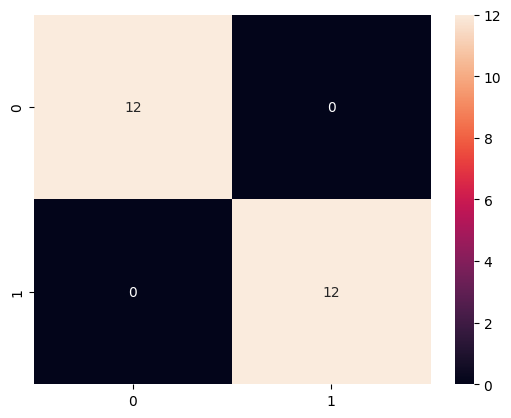

In [34]:
performance_metrics(svc)

# 3. K-Nearest Neighbor

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

> ## Hyper-parameter tuning

In [36]:
params = {
    "n_neighbors": [i for i in range(3, 10)],
    "weights": ["uniform", "distance"]
    }
grid_knn = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy', cv=3) 
grid_knn.fit(X_train, y_train)
knn = grid_knn.best_estimator_


Model: KNeighborsClassifier(n_neighbors=4, weights='distance')

********************************************************************************
Predicted values: [0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0]
Actual values: [0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0]
********************************************************************************
--------------------------------------------------------------------------------
Cross Validation Mean Accuracy Score: 0.7916666666666666
accuracy score: 83.33333333333334
recall score: 83.33333333333334
roc score: 83.33333333333334
--------------------------------------------------------------------------------

Confusion Matrix



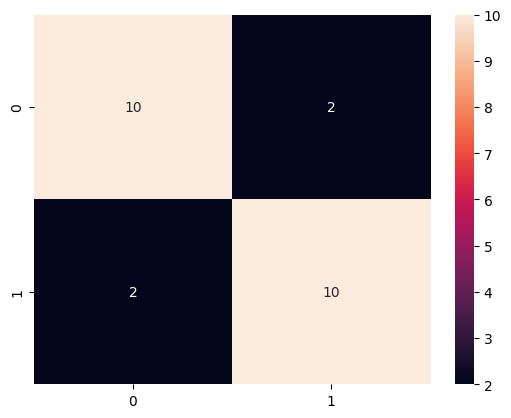

In [37]:
performance_metrics(knn)

# 4. Decision Tree Classifier 

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

> ## Hyper-parameter tuning

In [39]:
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [i for i in range(1, len(X.columns))]
}
grid_dtc = GridSearchCV(estimator=dtc, param_grid=params, scoring='accuracy', cv=3) 
grid_dtc.fit(X_train, y_train)
dtc = grid_dtc.best_estimator_

> ## Performance metrics


Model: DecisionTreeClassifier(criterion='entropy', max_depth=2)

********************************************************************************
Predicted values: [0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0]
Actual values: [0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0]
********************************************************************************
--------------------------------------------------------------------------------
Cross Validation Mean Accuracy Score: 0.75
accuracy score: 70.83333333333334
recall score: 66.66666666666666
roc score: 70.83333333333334
--------------------------------------------------------------------------------

Confusion Matrix



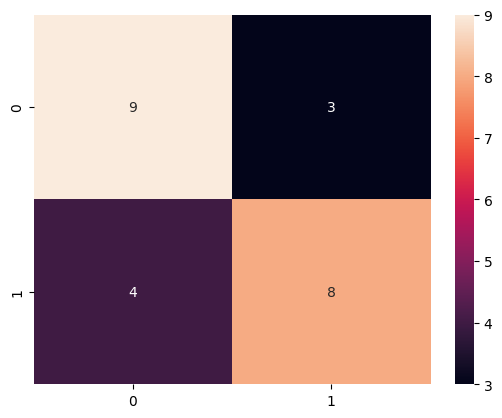

In [40]:
performance_metrics(dtc)

# 5. Random Forest Classifier 

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

> ## Hyper-parameter tuning

In [42]:
params = {
    "criterion": ["gini", "entropy"],
    "n_estimators": [i for i in range(1, 20)]
}
grid_rfc = GridSearchCV(estimator=rfc, param_grid=params, scoring='accuracy', cv=3) 
grid_rfc.fit(X_train, y_train)
rfc = grid_rfc.best_estimator_


Model: RandomForestClassifier(n_estimators=19)

********************************************************************************
Predicted values: [0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0]
Actual values: [0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0]
********************************************************************************
--------------------------------------------------------------------------------
Cross Validation Mean Accuracy Score: 0.7916666666666666
accuracy score: 79.16666666666666
recall score: 83.33333333333334
roc score: 79.16666666666666
--------------------------------------------------------------------------------

Confusion Matrix



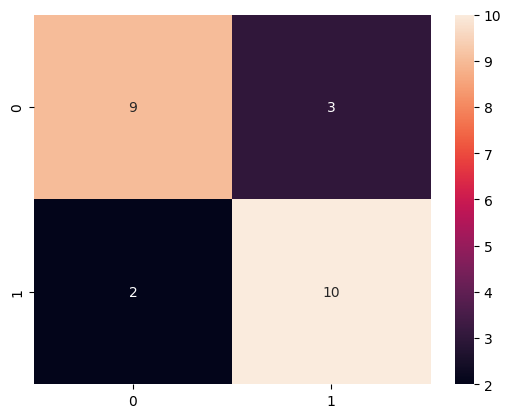

In [43]:
performance_metrics(rfc)

# Getting the Best Model

In [44]:
scores

defaultdict(dict,
            {'LogisticRegression': {'cv_score': 0.7917, 'acc_score': 95.8333},
             'SVC': {'cv_score': 0.7917, 'acc_score': 100.0},
             'KNeighborsClassifier': {'cv_score': 0.7917,
              'acc_score': 83.3333},
             'DecisionTreeClassifier': {'cv_score': 0.75,
              'acc_score': 70.8333},
             'RandomForestClassifier': {'cv_score': 0.7917,
              'acc_score': 79.1667}})

In [45]:
scores_sorted_by_cv = dict(sorted(scores.items(), key=lambda x: x[1]["cv_score"], reverse=True))
scores_sorted_by_cv

{'LogisticRegression': {'cv_score': 0.7917, 'acc_score': 95.8333},
 'SVC': {'cv_score': 0.7917, 'acc_score': 100.0},
 'KNeighborsClassifier': {'cv_score': 0.7917, 'acc_score': 83.3333},
 'RandomForestClassifier': {'cv_score': 0.7917, 'acc_score': 79.1667},
 'DecisionTreeClassifier': {'cv_score': 0.75, 'acc_score': 70.8333}}

In [46]:
scores_sorted_by_acc = dict(sorted(scores.items(), key=lambda x: x[1]["acc_score"], reverse=True))
scores_sorted_by_acc

{'SVC': {'cv_score': 0.7917, 'acc_score': 100.0},
 'LogisticRegression': {'cv_score': 0.7917, 'acc_score': 95.8333},
 'KNeighborsClassifier': {'cv_score': 0.7917, 'acc_score': 83.3333},
 'RandomForestClassifier': {'cv_score': 0.7917, 'acc_score': 79.1667},
 'DecisionTreeClassifier': {'cv_score': 0.75, 'acc_score': 70.8333}}

# Table of Results

In [47]:
scores_df = pd.DataFrame(scores)
scores_df

,LogisticRegression,SVC,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier
cv_score,0.7917,0.7917,0.7917,0.7500,0.7917
acc_score,95.8333,100.0000,83.3333,70.8333,79.1667


In [48]:
models = scores.keys()
acc_scores = []
cv_scores = []

for value in scores.values():
  cv_scores.append(value["cv_score"])
  acc_scores.append(value["acc_score"])

In [49]:
acc_df = pd.DataFrame({'Model': models, 'Acc_Score': acc_scores})
acc_df

,Model,Acc_Score
0,LogisticRegression,95.8333
1,SVC,100.0000
2,KNeighborsClassifier,83.3333
3,DecisionTreeClassifier,70.8333
4,RandomForestClassifier,79.1667


In [50]:
cv_df = pd.DataFrame({'Model': models, 'CV_Score': cv_scores})
cv_df

,Model,CV_Score
0,LogisticRegression,0.7917
1,SVC,0.7917
2,KNeighborsClassifier,0.7917
3,DecisionTreeClassifier,0.7500
4,RandomForestClassifier,0.7917


# Plot of the models' accuracy scores

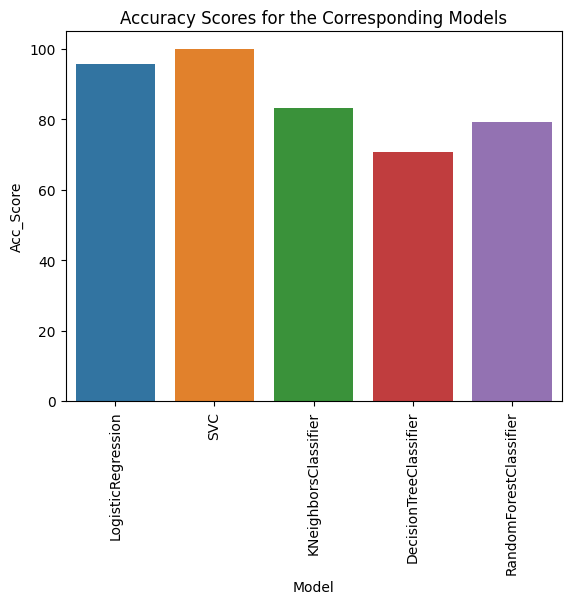

In [51]:
ax = sns.barplot(x = 'Model', y = 'Acc_Score', data=acc_df)
ax.set_title("Accuracy Scores for the Corresponding Models")
ax.set_xticklabels(models, rotation=90)
plt.show()

# Plot of the models' cross validation scores

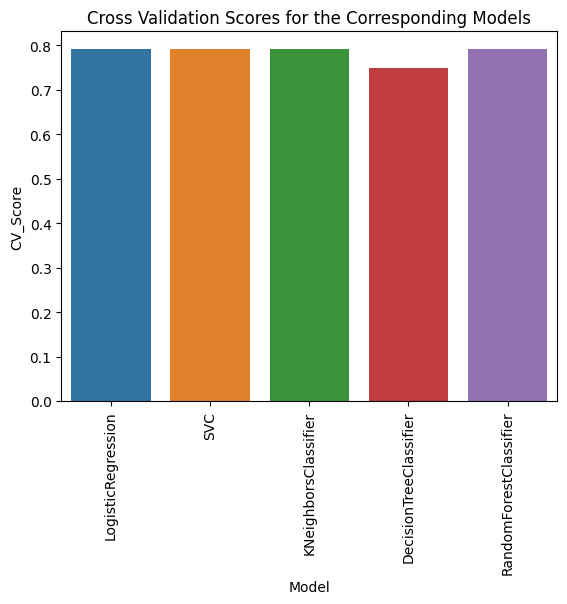

In [52]:
ax = sns.barplot(x = 'Model', y = 'CV_Score', data=cv_df)
ax.set_title("Cross Validation Scores for the Corresponding Models")
ax.set_xticklabels(models, rotation=90)
plt.show()

# Determining the best model

In [53]:
best_model_key = list(scores_sorted_by_cv.keys())[0]

In [54]:
models_dict = {
    'SVC': svc,
    'DecisionTreeClassifier': dtc,
    'RandomForestClassifier': rfc,
    'LogisticRegression': lr,
    'KNeighborsClassifier': knn
}

In [55]:
best_model = models_dict[best_model_key]

# Saving the best model

In [56]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
# !ls /content/gdrive/MyDrive

In [59]:
if not os.path.exists(save_dir):
  os.makedirs(save_dir)

In [60]:
with open(os.path.join(save_dir, "best_model.pkl"), 'wb') as pickle_file:
  pickle.dump(best_model, pickle_file)

# Loaded the saved model

In [61]:
with open(os.path.join(save_dir, "best_model.pkl"), 'rb') as pickle_file:
  loaded_model = pickle.load(pickle_file)

In [62]:
loaded_model.predict(X_test[0].reshape(1, -1))[0]

0

In [63]:
# arr = np.array([1, 11, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1])
arr = np.array([28.7, 44.7, 51.6, 160.0, 174.7, 824.6, 743.0, 357.5, 197.7, 266.9, 350.8, 48.4])

In [64]:
scaled_arr = scaler.transform(arr.reshape(1, -1))
scaled_arr

array([[0.34371257, 0.56582278, 0.23721787, 0.65317919, 0.17697695,
        0.69647215, 0.42347314, 0.14660329, 0.32220849, 0.39727673,
        0.95570189, 0.2388724 ]])

In [66]:
loaded_model.predict(scaled_arr.reshape(1, -1))[0]

1